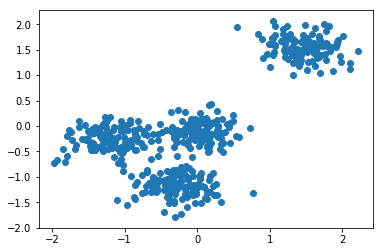

In [217]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('Dataset1.csv') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    data = np.array(data[1:], dtype=np.float)

plt.scatter(data[:,0],data[:,1])
plt.show()

In [218]:
def initialize_centers(X,K):
    C = []
    for i in range(K):
        C_x = np.random.random_sample()*4 - 2
        C_y = np.random.random_sample()*4 - 2
        C.append([C_x,C_y])
    return C

In [219]:
def find_closest_centers(X,C):
    idx = []
    for d in X:
        bestDist = np.Infinity
        bestIndex = -1
        for i in range(len(C)):
            center = C[i]
            dist = np.linalg.norm(d-center)
            if dist < bestDist:
                bestDist = dist
                bestIndex = i
        idx.append(bestIndex)
    return idx

In [220]:
def compute_means(X,idx,K,C):
    sumc = np.zeros((K,2))
    count = np.zeros(K)
    for i in range(len(X)):
        d = X[i]
        di = idx[i]
        sumc[di] = [sumc[di][0] + d[0],sumc[di][1] + d[1]]
        count[di] += 1
    newcenters = np.zeros((K,2))
    for i in range(K):
        if count[i] != 0:
            newcenters[i] = [sumc[i][0] / count[i],sumc[i][1] / count[i]]
        else:
            newcenters[i] = C[i]
    return newcenters

In [221]:
#KMeans
def KMeans(k,n,plot=True):
    centers = initialize_centers(data,k)
    for i in range(n):
        idx = find_closest_centers(data,centers)
        centers = compute_means(data,idx,k,centers)

    if plot:
        plt.scatter(data[:,0],data[:,1],c=idx)
        plt.show()
    
    #Return SSE error
    sum_dist = 0
    for i in range(len(data)):
        d = data[i]
        di = idx[i]
        center = centers[di]
        sum_dist += np.linalg.norm(d-center) ** 2
    return sum_dist / len(data)

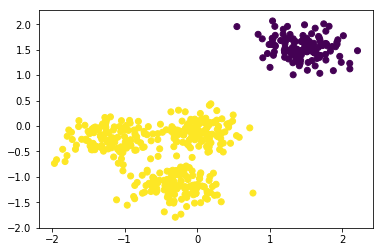

In [222]:
KMeans(2,20);

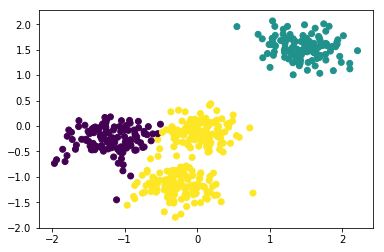

In [223]:
KMeans(3,20);

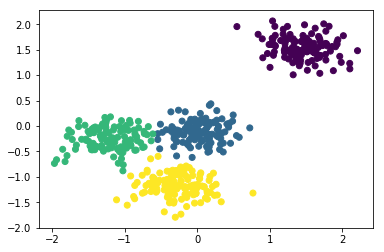

In [224]:
KMeans(4,20);

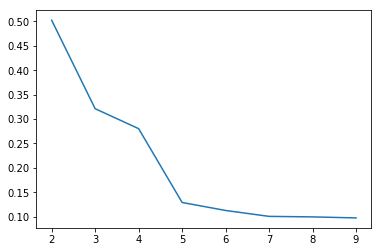

In [225]:
#Display Error-K Graph
plot_info = np.zeros((8,2))
for k in range(2,10):
    sse = KMeans(k,20,plot=False)
    plot_info[k-2] = [k,sse]
    
plt.plot(plot_info[:,0],plot_info[:,1])
plt.show()

In [226]:
with open('Dataset2.csv') as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    data = np.array(data[1:], dtype=np.float)

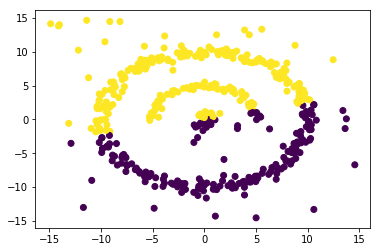

55.49509068210551

In [227]:
KMeans(2,20)

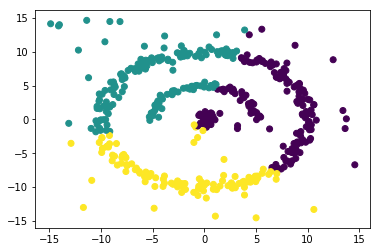

34.6108115846544

In [228]:
KMeans(3,20)

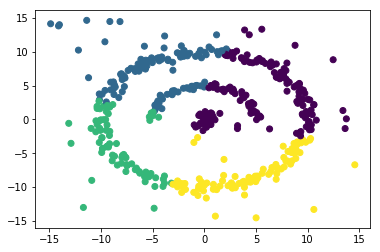

25.044008464918832

In [229]:
KMeans(4,20)

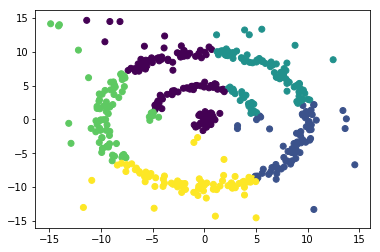

21.160881771585494

In [230]:
KMeans(5,20)